<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [4]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
filename = "m4_survey_data.sqlite"

urllib.request.urlretrieve(url, filename)

('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x24bc4413ad0>)

Connect to the database.


In [5]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [6]:
import pandas as pd

## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [17]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [16]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


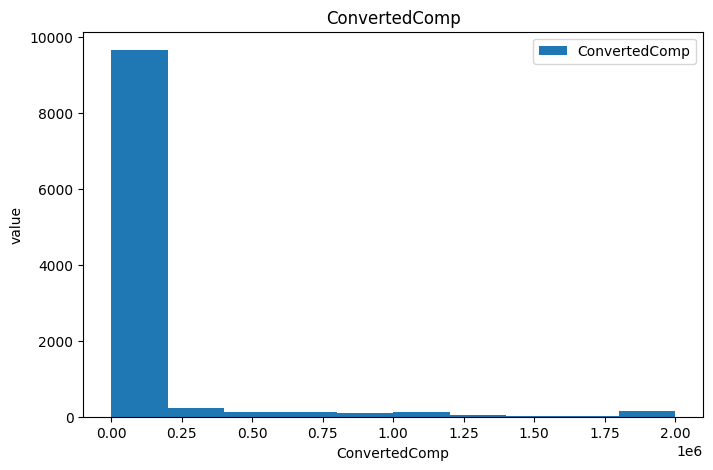

In [26]:
QUERY = """
SELECT ConvertedComp
FROM master

"""
Hist= pd.read_sql_query(QUERY,conn)
Hist

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Hist.plot(kind='hist', figsize=(8, 5))
plt.title('ConvertedComp') # add a title to the histogram
plt.ylabel('value') # add y-label
plt.xlabel('ConvertedComp') # add x-label
plt.show()

### Box Plots


Plot a box plot of `Age.`


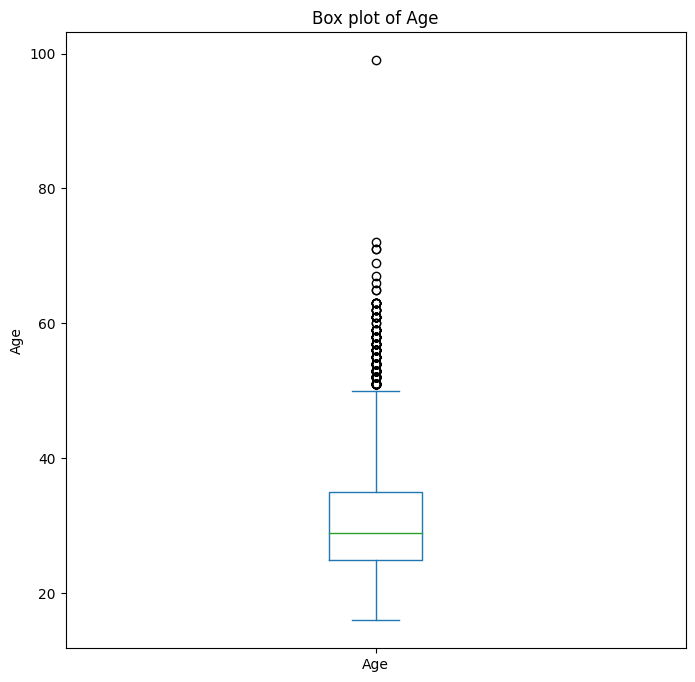

In [27]:
QUERY = """
SELECT Age
FROM master

"""
Box= pd.read_sql_query(QUERY,conn)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Box.plot(kind='box', figsize=(8,8))
plt.title('Box plot of Age')
plt.ylabel('Age')
# Adjust the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


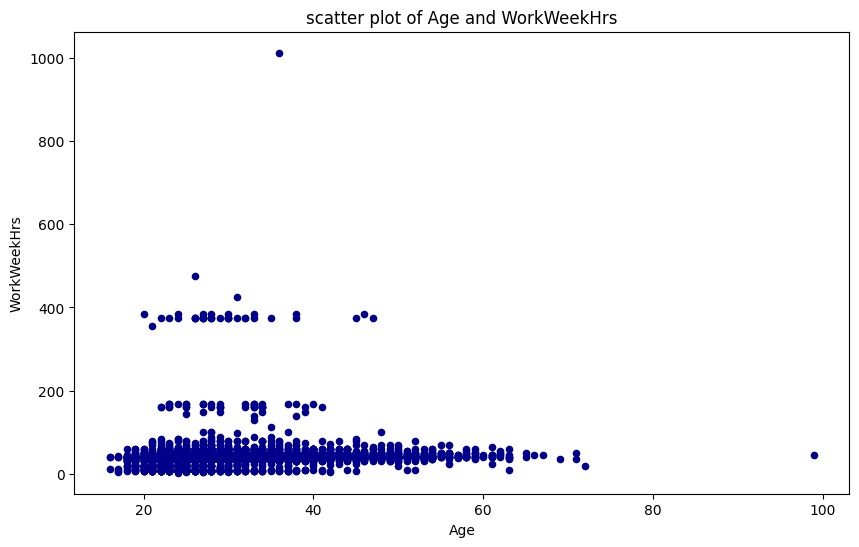

In [68]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""
Scatter= pd.read_sql_query(QUERY,conn)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Scatter.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')
plt.title('scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


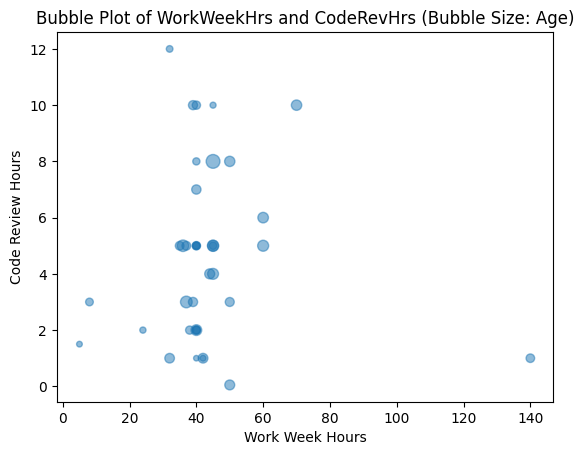

In [37]:


QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
group by age
order by age
"""
bubble= pd.read_sql_query(QUERY,conn)
bubble

plt.scatter(bubble['WorkWeekHrs'], bubble['CodeRevHrs'], s=bubble['Age'], alpha=0.5)
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs (Bubble Size: Age)')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


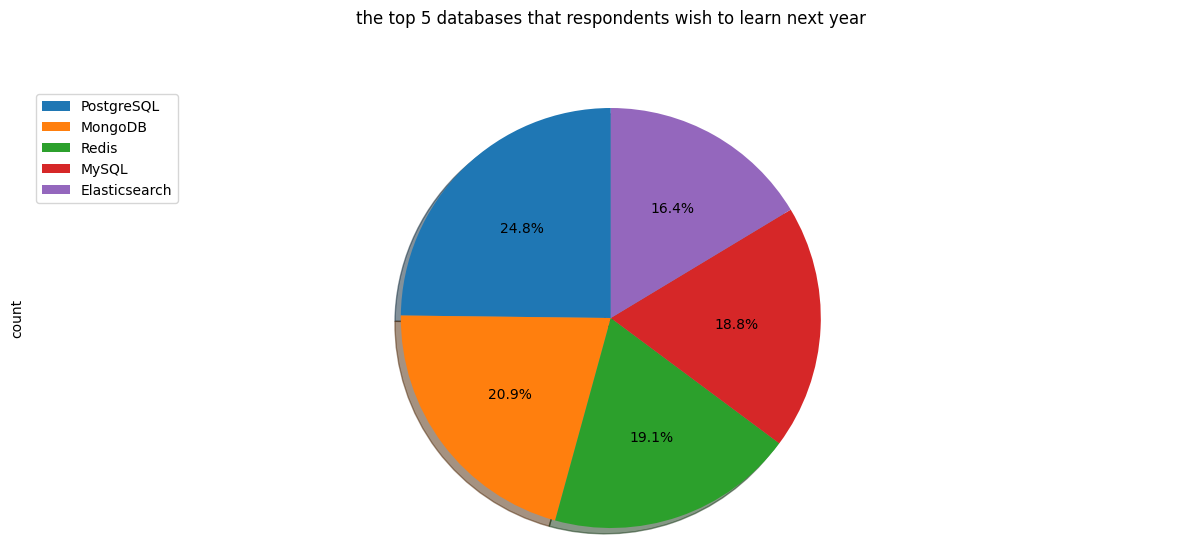

In [49]:
# print all the tables names in the database
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count DESC
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
DDNY = pd.read_sql_query(QUERY,conn)
Top_5 = DDNY.head(5)
#ploting
Top_5['count'].plot(kind='pie',
                       figsize=(15, 6),
                       autopct='%1.1f%%',
                       startangle=90,
                       shadow=True,
                        labels=None, # turn off labels on pie chart
                    )
# scale the title up by 12% to match pctdistance
plt.title('the top 5 databases that respondents wish to learn next year', y=1.12)
plt.axis('equal')
 # add legend
plt.legend(labels=Top_5['DatabaseDesireNextYear'], loc='upper left')
 # show plot
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


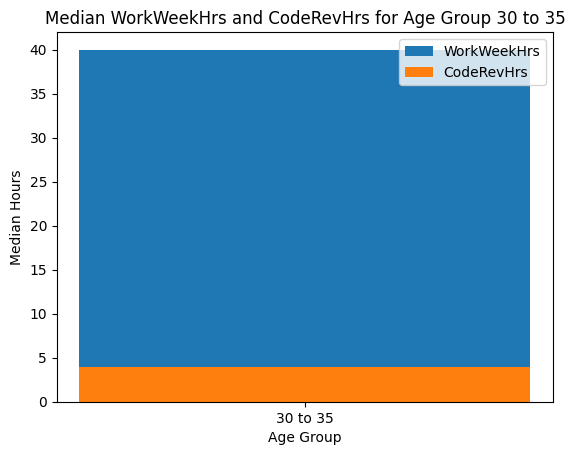

In [58]:
# print all the tables names in the database
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE AGE BETWEEN 30 AND 35
ORDER BY AGE
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
Hrs30to35 = pd.read_sql_query(QUERY,conn)
Hrs30to35

# Calculate the median WorkWeekHrs and CodeRevHrs
median_workweekhrs = Hrs30to35['WorkWeekHrs'].median()
median_coderevhrs = Hrs30to35['CodeRevHrs'].median()

# Create the stacked bar chart
plt.bar('30 to 35', median_workweekhrs, label='WorkWeekHrs')
plt.bar('30 to 35', median_coderevhrs, label='CodeRevHrs')
plt.xlabel('Age Group')
plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')


plt.legend()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


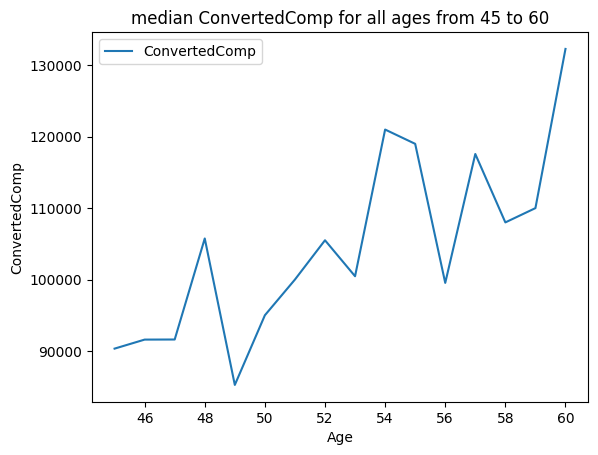

In [62]:
QUERY = """
SELECT Age, ConvertedComp 
FROM master
WHERE AGE BETWEEN 45 AND 60
ORDER BY AGE
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
Comp45to60 = pd.read_sql_query(QUERY,conn)
median_Comp45to60=Comp45to60.groupby(['Age']).median()
median_Comp45to60

#ploting
median_Comp45to60.plot(kind='line')
plt.title('median ConvertedComp for all ages from 45 to 60')
plt.ylabel('ConvertedComp')
plt.xlabel('Age')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


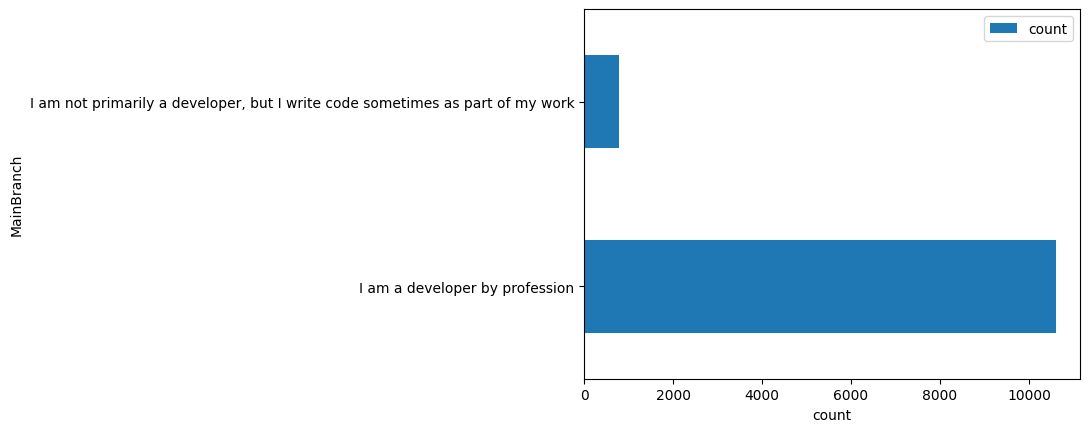

In [97]:
# print all the tables names in the database
QUERY = """
SELECT MainBranch, COUNT(*) AS count
FROM master
GROUP BY MainBranch

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
Hbar = pd.read_sql_query(QUERY,conn)
Hbar
Hbar.set_index('MainBranch',inplace=True)
#ploting
Hbar.plot(kind='barh')
plt.xlabel('count')
plt.ylabel('MainBranch')

plt.show()

Close the database connection.


In [98]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
